We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2021-01-14 12:11:39--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.209.16, 13.227.209.26, 13.227.209.121, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.209.16|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-12-14   14     12  2020    746       6             Afghanistan    AF   
1 2020-12-13   13     12  2020    298       9             Afghanistan    AF   
2 2020-12-12   12     12  2020    113      11             Afghanistan    AF   
3 2020-12-11   11     12  2020     63      10             Afghanistan    AF   
4 2020-12-10   10     12  2020    202      16             Afghanistan    AF   
5 2020-12-09    9     12  2020    135      13             Afghanistan    AF   
6 2020-12-08    8     12  2020    200       6             Afghanistan    AF   
7 2020-12-07    7     12  2020    210      26             Afghanistan    AF   
8 2020-12-06    6     12  2020    234      10             Afghanistan    AF   
9 2020-12-05    5     12  2020    235      18             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           9.013779           
1                                           7.052776           
2                                           6.868768           
3                                           7.134266           
4                                           6.968658           
5                                           6.963401           
6                                           7.094835           
7                                           7.215755           
8                                           7.326160           
9                                           7.115865

Last check of our source dataframe.

In [4]:
df.count()

dateRep                                                       61900
day                                                           61900
month                                                         61900
year                                                          61900
cases                                                         61900
deaths                                                        61900
countriesAndTerritories                                       61900
geoId                                                         61900
countryterritoryCode                                          61777
popData2019                                                   61777
continentExp                                                  61900
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    59021
dtype: int64

We pivot to a country by column format.

In [5]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         \
geoId         AD      AE     AF   AG   AI     AL      AM     AO      AR   
dateRep                                                                   
2019-12-31   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-01   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-02   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-03   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-04   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
...          ...     ...    ...  ...  ...    ...     ...    ...     ...   
2020-12-10  35.0  1313.0  202.0  0.0  0.0  752.0  1174.0   75.0  5303.0   
2020-12-11  28.0  1255.0   63.0  0.0  0.0  873.0  1077.0  121.0  6994.0   
2020-12-12  46.0  1196.0  113.0  1.0  0.0  802.0   995.0  136.0  7112.0   
2020-12-13  52.0  1154.0  298.0  1.0  0.0  879.0  1013.0  100.0  5274.0   
2020-12-14  50.0  1194.0  746.0  0.0  0.0  788.0   357.0   27.0  3558.0   

                    ... deaths                                                  
geoId           AT  ...     VG   VI   VN   VU   WF    XK   YE     ZA   ZM   ZW  
dateRep             ...                                                         
2019-12-31     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-01     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-02     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-03     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-04     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
...            ...  ...    ...  ...  ...  ...  ...   ...  ...    ...  ...  ...  
2020-12-10  2913.0  ...    0.0  0.0  0.0  0.0  0.0  11.0  0.0  142.0  0.0  1.0  
2020-12-11  2466.0  ...    0.0  0.0  0.0  0.0  0.0  13.0  0.0  173.0  0.0  1.0  
2020-12-12  3026.0  ...    0.0  0.0  0.0  0.0  0.0  13.0  0.0  205.0  1.0  1.0  
2020-12-13  2938.0  ...    0.0  0.0  0.0  0.0  0.0  12.0  0.0  154.0  1.0  1.0  
2020-12-14  3005.0  ...    0.0  0.0  0.0  0.0  0.0  12.0  0.0  170.0  1.0  0.0  

[350 rows x 428 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [6]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths           \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VG  VI   VN   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ...   
2021-12-10   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-11   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-12   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-13   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-14   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   

                                        
geoId       VU  WF  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN NaN NaN NaN NaN NaN NaN  
2020-01-01 NaN NaN NaN NaN NaN NaN NaN  
2020-01-02 NaN NaN NaN NaN NaN NaN NaN  
2020-01-03 NaN NaN NaN NaN NaN NaN NaN  
2020-01-04 NaN NaN NaN NaN NaN NaN NaN  
...         ..  ..  ..  ..  ..  ..  ..  
2021-12-10 NaN NaN NaN NaN NaN NaN NaN  
2021-12-11 NaN NaN NaN NaN NaN NaN NaN  
2021-12-12 NaN NaN NaN NaN NaN NaN NaN  
2021-12-13 NaN NaN NaN NaN NaN NaN NaN  
2021-12-14 NaN NaN NaN NaN NaN NaN NaN  

[715 rows x 428 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [7]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    715.000000
mean     357.000000
std      206.547008
min        0.000000
25%      178.500000
50%      357.000000
75%      535.500000
max      714.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [8]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [9]:
country  = 'NL'
measure  = 'cases'
smeasure = 'scases' # smoothed
rmeasure = 'rcases' # remaining
pmeasure = 'pcases' # predicted
wmeasure = 'wcases' # waves

wave = -1

df_geo[(pmeasure, country)] = 0
df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7).mean()
df_geo[(rmeasure, country)] = df_geo[smeasure][country]

plotlist = [(smeasure, country), (pmeasure, country)]

To ignore early outbreaks and long tails, we define the minimum case count as one in million.

In [10]:
popdata = df[df['geoId'] == country]['popData2019'].iloc[0]
#mincases = popdata / 1e6
#mincases = 100
mincases = 2
#mincases = max(popdata / 1e6, 2)
print('Minimum number of cases is {:1.0f}'.format(mincases))

Minimum number of cases is 2


# Iterate here

In [11]:
wave += 1
curwave = wmeasure + str(wave)
df_geo[(curwave, country)] = 0
plotlist += [(curwave, country)]

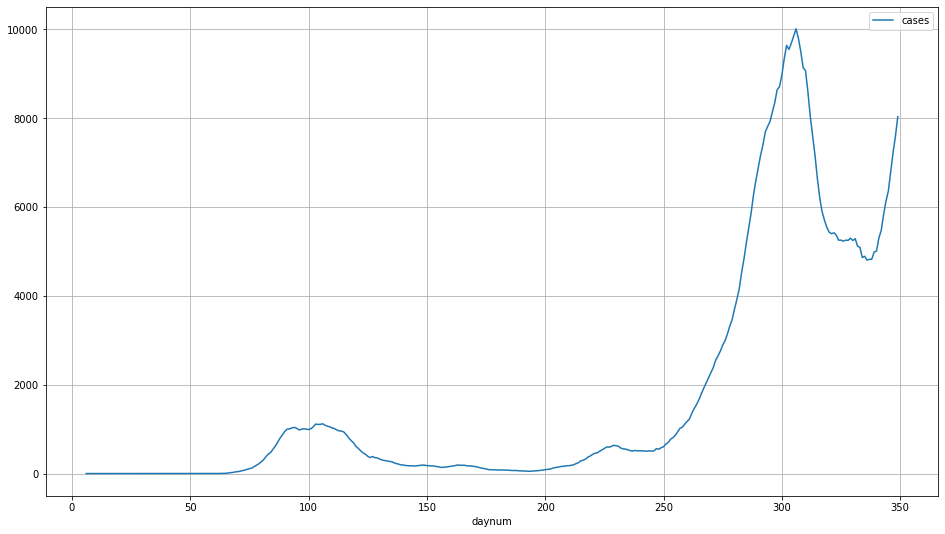

In [12]:
df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                        measure:df_geo[rmeasure][country]})
df_pred[df_pred[measure].notnull()].plot(x='daynum', y=measure, figsize=(16, 9), grid=True)

The `cumul`column gets the cumulative cases. Using these, we divide the current by the cumulative cases. According to Gumbel this should have a logarithmic form, so using a logarithmic scale it should approach linearity.

To prevent errors we only use values above 0 and take the logarithm. Then we cut off the range to remove noise at the beginning and end of the curve and filter out days with number of cases below the minimum.

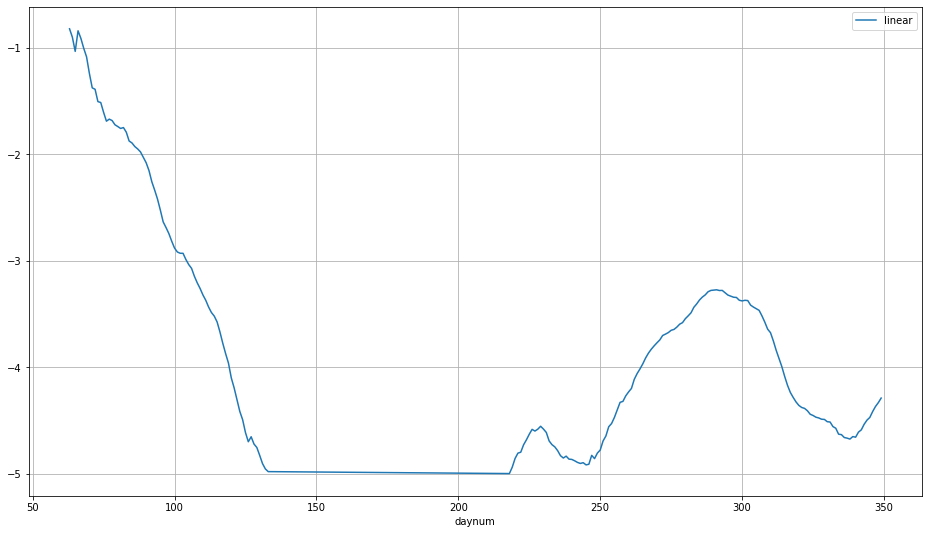

In [13]:
df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

df_pred['linear'] = np.log(df_pred['gumdiv'])

df_pred = df_pred[(df_pred['linear'] < -0.5) &
                  (df_pred['linear'] > -5.0)]

df_pred.plot(x='daynum', y='linear', figsize=(16, 9), grid=True)

Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     1.171007  1      1.183  0.000  0.000  
1     0       0    70    0.188167  3      0.194  0.839  0.836  
2     0       0    156   0.105241  5      0.111  0.910  0.906  
3     0       0    92    0.047054  7      0.050  0.960  0.957  
4     0       0    172   0.021648  9      0.024  0.982  0.980  
5     0       0    140   0.016632  11     0.019  0.986  0.984  
6     0       0    48    0.012749  13     0.015  0.989  0.988  
7     0       0    86    0.008097  15     0.009  0.993  0.992  
8     0       0    192   0.005859  17     0.007  0.995  0.994  
9     0       0    72    0.005429  19     0.007  0.995  0.994  
10    0       0    80    0.004854  21     0.006  0.996  0.995  
11    0       0    96    0.004406  23     0.006  0.996  0.995  
---------------------------

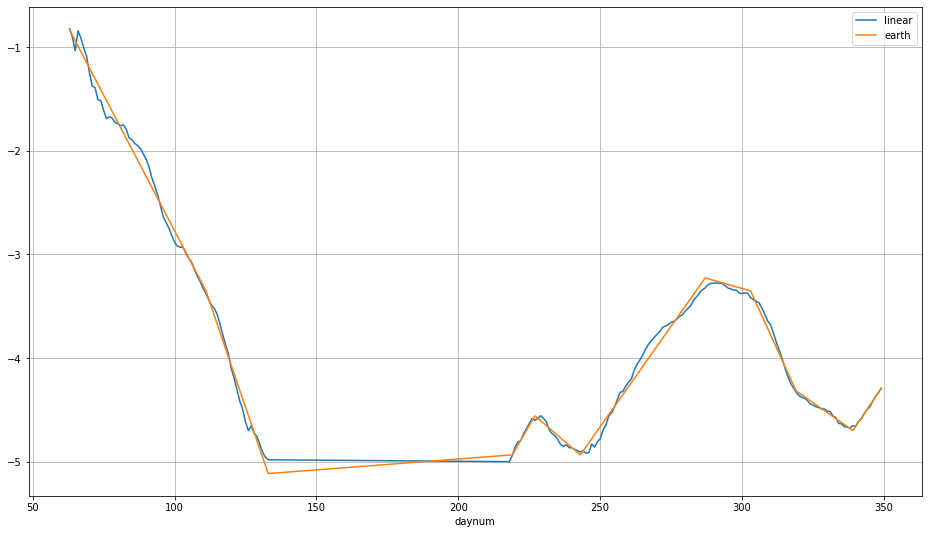

In [14]:
from pyearth import Earth

eax = df_pred['daynum'].values.reshape(-1, 1)
eay = df_pred['linear'].values.reshape(-1, 1)

#model = Earth()
#model = Earth(minspan=0)
model = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
model.fit(eax, eay)

print(model.trace())
print(model.summary())

df_pred['earth'] = model.predict(eax)

daymin = df_pred['daynum'].min()
daymax = df_pred['daynum'].max()
print('From {} to {}'.format(daymin, daymax))

df_pred.plot(x='daynum', y=['linear', 'earth'], figsize=(16, 9), grid=True)

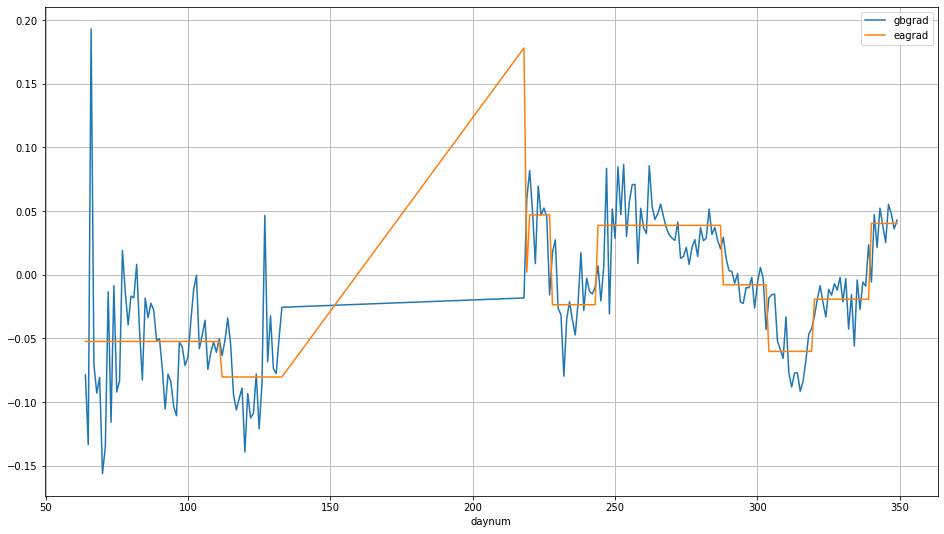

In [15]:
#df_pred['gbgrad'] = np.gradient(df_pred['linear'])
#df_pred['eagrad'] = np.gradient(df_pred['earth'])

df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

#df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
#df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

df_pred.plot(x='daynum', y=['gbgrad', 'eagrad'], figsize=(16, 9), grid=True)

In [16]:
from pyearth import export
fitmod = export.export_python_function(model)
print(export.export_python_string(model))

def model(example_iterator):
    accessors = [lambda x: -28.868789734947452,
		lambda x: 0.14758957994662628 * max(0, x[0] - 133.0),
		lambda x: -0.06518947402206364 * max(0, 133.0 - x[0]),
		lambda x: -0.05229774904208796 * max(0, x[0] - 303.0),
		lambda x: 0.04102253061638614 * max(0, 319.0 - x[0]),
		lambda x: -0.04669877955893362 * max(0, x[0] - 287.0),
		lambda x: -0.027912796417820587 * max(0, 111.0 - x[0]),
		lambda x: 0.0594945348623183 * max(0, 339.0 - x[0]),
		lambda x: 0.044976511481865475 * max(0, 219.0 - x[0]),
		lambda x: -0.07059466187820727 * max(0, x[0] - 227.0),
		lambda x: 0.06233245145940549 * max(0, x[0] - 243.0)]
    for x in example_iterator:
        yield sum(accessor(x) for accessor in accessors)
    


In [17]:
df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                   (df_pred['daynum'] == (daymin + 1)) |
                   (df_pred['daynum'] == daymax))
df_pred['daycount'] = df_pred.reset_index().index
df_pred[df_pred['knot']]

daynum        cases    gumdiv    linear     earth    gbgrad  \
2020-03-04      64     4.000000  0.405797 -0.901902 -0.885663 -0.078702   
2020-04-21     112   979.142857  0.032196 -3.435915 -3.428359 -0.063471   
2020-08-05     218   368.714286  0.006738 -4.999936 -4.936585 -0.018225   
2020-08-06     219   394.285714  0.007154 -4.940063 -4.934489  0.059874   
2020-08-07     220   431.285714  0.007765 -4.858163 -4.887416  0.081900   
2020-08-15     228   612.000000  0.010222 -4.583256 -4.581431  0.017417   
2020-08-31     244   511.571429  0.007463 -4.897804 -4.895453  0.007137   
2020-10-14     288  6260.571429  0.037154 -3.292685 -3.234498  0.029407   
2020-10-30     304  9680.428571  0.032176 -3.436541 -3.413011 -0.018137   
2020-11-15     320  5430.428571  0.012778 -4.360048 -4.334968 -0.032553   
2020-12-05     340  5003.000000  0.009483 -4.658283 -4.658748 -0.005694   
2020-12-14     349  8027.571429  0.013692 -4.290934 -4.295770  0.042942   

              eagrad  knot  daycount  
2020-03-04 -0.052391  True         1  
2020-04-21 -0.080304  True        49  
2020-08-05  0.178160  True        71  
2020-08-06  0.002096  True        72  
2020-08-07  0.047073  True        73  
2020-08-15 -0.023522  True        81  
2020-08-31  0.038810  True        97  
2020-10-14 -0.007888  True       141  
2020-10-30 -0.060186  True       157  
2020-11-15 -0.019164  True       173  
2020-12-05  0.040331  True       193  
2020-12-14  0.040331  True       202

In [18]:
df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

#df_knot['eadiff'] = df_knot['eagrad'] - df_knot['eagrad'].shift(1)
#df_knot['eamax'] = np.maximum.accumulate(df_knot['eagrad'])

df_knot

daynum  daycount    eagrad  daysdata  daystime
2020-03-04      64         1 -0.052391      48.0      48.0
2020-04-21     112        49 -0.080304      22.0     106.0
2020-08-05     218        71  0.178160       1.0       1.0
2020-08-06     219        72  0.002096       1.0       1.0
2020-08-07     220        73  0.047073       8.0       8.0
2020-08-15     228        81 -0.023522      16.0      16.0
2020-08-31     244        97  0.038810      44.0      44.0
2020-10-14     288       141 -0.007888      16.0      16.0
2020-10-30     304       157 -0.060186      16.0      16.0
2020-11-15     320       173 -0.019164      20.0      20.0
2020-12-05     340       193  0.040331       9.0       9.0
2020-12-14     349       202  0.040331       NaN       NaN

In [19]:
df_knot['cand'] = ((df_knot['daysdata'] >= 3) &
                   (df_knot['eagrad'] < -1/44))# &
#                   (df_knot['daysdata'] == df_knot['daystime']))
df_knot

daynum  daycount    eagrad  daysdata  daystime   cand
2020-03-04      64         1 -0.052391      48.0      48.0   True
2020-04-21     112        49 -0.080304      22.0     106.0   True
2020-08-05     218        71  0.178160       1.0       1.0  False
2020-08-06     219        72  0.002096       1.0       1.0  False
2020-08-07     220        73  0.047073       8.0       8.0  False
2020-08-15     228        81 -0.023522      16.0      16.0   True
2020-08-31     244        97  0.038810      44.0      44.0  False
2020-10-14     288       141 -0.007888      16.0      16.0  False
2020-10-30     304       157 -0.060186      16.0      16.0   True
2020-11-15     320       173 -0.019164      20.0      20.0  False
2020-12-05     340       193  0.040331       9.0       9.0  False
2020-12-14     349       202  0.040331       NaN       NaN  False

In [20]:
df_knot['since'] = df_knot['daynum'] - daymin
#df_knot['score'] = - df_knot['eagrad']
#df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata'] / df_knot['daystime']
#df_knot['score'] = - df_knot['eagrad'] / df_knot['since']
#df_knot['score'] = (df_knot['eagrad'] ** 2) / np.sqrt(df_knot['since'])
#df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata']
df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
df_knot

daynum  daycount    eagrad  daysdata  daystime   cand  since  \
2020-03-04      64         1 -0.052391      48.0      48.0   True      1   
2020-04-21     112        49 -0.080304      22.0     106.0   True     49   
2020-08-05     218        71  0.178160       1.0       1.0  False    155   
2020-08-06     219        72  0.002096       1.0       1.0  False    156   
2020-08-07     220        73  0.047073       8.0       8.0  False    157   
2020-08-15     228        81 -0.023522      16.0      16.0   True    165   
2020-08-31     244        97  0.038810      44.0      44.0  False    181   
2020-10-14     288       141 -0.007888      16.0      16.0  False    225   
2020-10-30     304       157 -0.060186      16.0      16.0   True    241   
2020-11-15     320       173 -0.019164      20.0      20.0  False    257   
2020-12-05     340       193  0.040331       9.0       9.0  False    277   
2020-12-14     349       202  0.040331       NaN       NaN  False    286   

               score  
2020-03-04  0.019017  
2020-04-21  0.011432  
2020-08-05  0.008996  
2020-08-06  0.000001  
2020-08-07  0.001771  
2020-08-15  0.000618  
2020-08-31  0.002724  
2020-10-14  0.000064  
2020-10-30  0.003677  
2020-11-15  0.000410  
2020-12-05  0.001196  
2020-12-14       NaN

In [21]:
df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()
df_knot

daynum  daycount    eagrad  daysdata  daystime   cand  since  \
2020-03-04      64         1 -0.052391      48.0      48.0   True      1   
2020-04-21     112        49 -0.080304      22.0     106.0   True     49   
2020-08-05     218        71  0.178160       1.0       1.0  False    155   
2020-08-06     219        72  0.002096       1.0       1.0  False    156   
2020-08-07     220        73  0.047073       8.0       8.0  False    157   
2020-08-15     228        81 -0.023522      16.0      16.0   True    165   
2020-08-31     244        97  0.038810      44.0      44.0  False    181   
2020-10-14     288       141 -0.007888      16.0      16.0  False    225   
2020-10-30     304       157 -0.060186      16.0      16.0   True    241   
2020-11-15     320       173 -0.019164      20.0      20.0  False    257   
2020-12-05     340       193  0.040331       9.0       9.0  False    277   
2020-12-14     349       202  0.040331       NaN       NaN  False    286   

               score  choice  
2020-03-04  0.019017    True  
2020-04-21  0.011432   False  
2020-08-05  0.008996   False  
2020-08-06  0.000001   False  
2020-08-07  0.001771   False  
2020-08-15  0.000618   False  
2020-08-31  0.002724   False  
2020-10-14  0.000064   False  
2020-10-30  0.003677   False  
2020-11-15  0.000410   False  
2020-12-05  0.001196   False  
2020-12-14       NaN   False

In [22]:
choice = df_knot[df_knot['choice']]
lower = choice['daynum'].values[0]
upper = choice['daysdata'].values[0] + lower
print('From {} to {}'.format(lower, upper))

From 64 to 112.0


From slope and intercept of this line we can calculate beta and mu of the corresponding Gumbel distribution. Because the resulting CDF always ends at 1, we need to scale back to the original data dividing the number of cases in the dataset by the sum of the Gumbel PDF for the same days.

In [23]:
#lower = 185
#upper = 187

df_pred = df_pred[(df_pred['daynum'] >= lower) &
                  (df_pred['daynum'] <= upper)].copy()

slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
intercept = fitmod([[lower]])[0] - (lower * slope)

print('From {} to {} with slope {:1.4f} and intercept {:1.3f}'.format(
    lower, upper, slope, intercept))

beta = - 1 / slope
mu = beta * (intercept + np.log(beta))

df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

#final = np.exp(np.log(df_pred['scale']).mean())
final = df_pred['scale'].mean()

print('Gumbel beta {:1.3f} with mu {:1.0f} for {:1.0f}'.format(beta, mu, final))

From 64 to 112.0 with slope -0.0530 and intercept 2.505
Gumbel beta 18.878 with mu 103 for 49555


In [24]:
df_pred

daynum        cases    gumdiv    linear     earth    gbgrad  \
2020-03-04      64     4.000000  0.405797 -0.901902 -0.885663 -0.078702   
2020-03-05      65     5.428571  0.355140 -1.035243 -0.938055 -0.133341   
2020-03-06      66    11.571429  0.430851 -0.841993 -0.990446  0.193250   
2020-03-07      67    18.000000  0.401274 -0.913111 -1.042837 -0.071118   
2020-03-08      68    25.857143  0.365657 -1.006061 -1.095228 -0.092950   
2020-03-09      69    36.000000  0.337349 -1.086636 -1.147620 -0.080575   
2020-03-10      70    43.285714  0.288571 -1.242813 -1.200011 -0.156177   
2020-03-11      71    50.571429  0.252137 -1.377784 -1.252402 -0.134971   
2020-03-12      72    66.428571  0.248796 -1.391121 -1.304794 -0.013338   
2020-03-13      73    76.000000  0.221574 -1.506997 -1.357185 -0.115876   
2020-03-14      74    96.571429  0.219695 -1.515517 -1.409576 -0.008520   
2020-03-15      75   110.142857  0.200364 -1.607620 -1.461968 -0.092103   
2020-03-16      76   124.285714  0.184400 -1.690647 -1.514359 -0.083027   
2020-03-17      77   156.000000  0.187952 -1.671570 -1.566750  0.019077   
2020-03-18      78   189.000000  0.185476 -1.684830 -1.619141 -0.013260   
2020-03-19      79   221.142857  0.178320 -1.724173 -1.671533 -0.039343   
2020-03-20      80   263.714286  0.175359 -1.740922 -1.723924 -0.016749   
2020-03-21      81   312.857143  0.172210 -1.759038 -1.776315 -0.018116   
2020-03-22      82   381.714286  0.173631 -1.750826 -1.828707  0.008212   
2020-03-23      83   438.428571  0.166269 -1.794146 -1.881098 -0.043320   
2020-03-24      84   476.571429  0.153070 -1.876862 -1.933489 -0.082716   
2020-03-25      85   550.714286  0.150298 -1.895134 -1.985881 -0.018271   
2020-03-26      86   623.000000  0.145318 -1.928829 -2.038272 -0.033696   
2020-03-27      87   710.142857  0.142106 -1.951184 -2.090663 -0.022355   
2020-03-28      88   801.285714  0.138187 -1.979149 -2.143055 -0.027965   
2020-03-29      89   875.857143  0.131226 -2.030836 -2.195446 -0.051687   
2020-03-30      90   951.714286  0.124796 -2.081073 -2.247837 -0.050237   
2020-03-31      91  1000.142857  0.115941 -2.154671 -2.300228 -0.073599   
2020-04-01      92  1005.000000  0.104347 -2.260029 -2.352620 -0.105358   
2020-04-02      93  1028.857143  0.096514 -2.338063 -2.405011 -0.078034   
2020-04-03      94  1038.000000  0.088732 -2.422134 -2.457402 -0.084071   
2020-04-04      95  1017.142857  0.079994 -2.525807 -2.509794 -0.103673   
2020-04-05      96   980.714286  0.071606 -2.636578 -2.562185 -0.110771   
2020-04-06      97   997.857143  0.067910 -2.689575 -2.614576 -0.052997   
2020-04-07      98  1007.571429  0.064171 -2.746209 -2.666968 -0.056634   
2020-04-08      99   997.857143  0.059754 -2.817511 -2.719359 -0.071302   
2020-04-09     100   990.714286  0.056004 -2.882329 -2.771750 -0.064818   
2020-04-10     101  1009.285714  0.053975 -2.919242 -2.824142 -0.036914   
2020-04-11     102  1053.428571  0.053331 -2.931241 -2.876533 -0.011998   
2020-04-12     103  1112.285714  0.053309 -2.931656 -2.928924 -0.000415   
2020-04-13     104  1105.142857  0.050302 -2.989710 -2.981315 -0.058054   
2020-04-14     105  1106.857143  0.047964 -3.037312 -3.033707 -0.047602   
2020-04-15     106  1119.857143  0.046281 -3.073022 -3.086098 -0.035710   
2020-04-16     107  1086.285714  0.042965 -3.147374 -3.138489 -0.074352   
2020-04-17     108  1064.571429  0.040405 -3.208809 -3.190881 -0.061436   
2020-04-18     109  1050.285714  0.038334 -3.261408 -3.243272 -0.052599   
2020-04-19     110  1025.142857  0.036067 -3.322372 -3.295663 -0.060964   
2020-04-20     111  1009.714286  0.034306 -3.372444 -3.348055 -0.050073   
2020-04-21     112   979.142857  0.032196 -3.435915 -3.428359 -0.063471   

              eagrad   knot  daycount     pgumb         scale  
2020-03-04 -0.052391   True         1  0.000171  23338.208578  
2020-03-05 -0.052391  False         2  0.000243  22348.059551  
2020-03-06 -0.052391  False         3  0.000337  34315.399418  
2020-

Finished fitting, now back to the original data! We apply the Gumbel PDF to the original day numbers and scale by the current cases as part of the total.

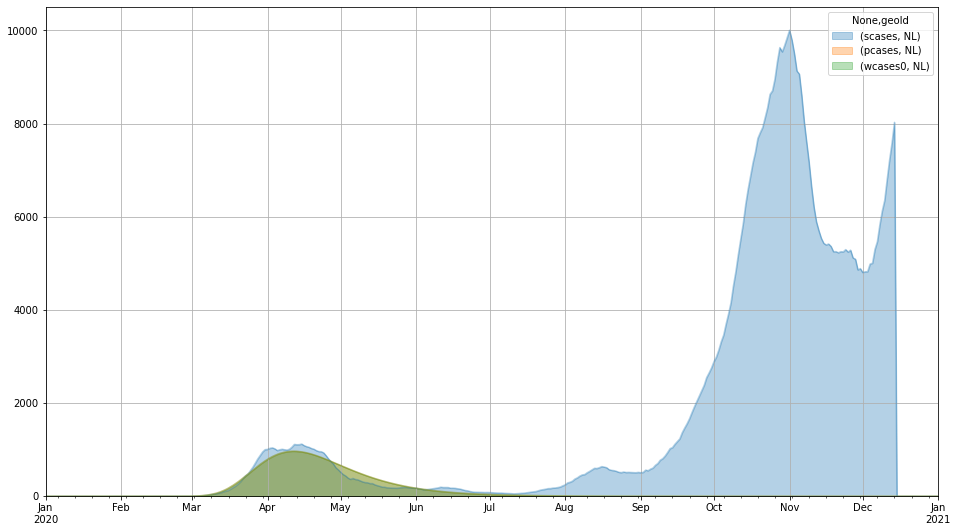

In [25]:
df_geo[(curwave, country)] = gumpdf(df_geo['daynum'], beta, mu) * final
df_geo[(pmeasure, country)] += df_geo[(curwave, country)]
df_geo[plotlist].loc['20200101':'20210101'].plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

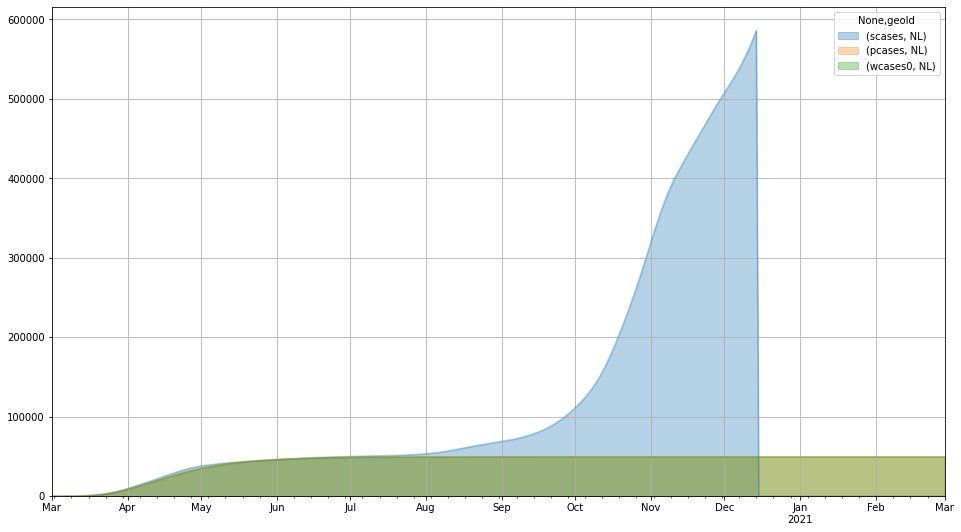

In [26]:
df_geo[plotlist].loc['20200301':'20210301'].cumsum().plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

We have the estimate for the final number of cases, so the progress would be the current number of cases divided by the final number. This could end up over 100%, if we estimate that the current wave of the outbreak is over and new cases are due to relaxing of measures, increase in testing or other factors.

In [27]:
progress = df_geo[measure][country].sum() / df_geo[pmeasure][country].sum()
print('Currently at {:1.2f}% of {:1.0f}'.format(progress * 100, df_geo[pmeasure][country].sum()))

Currently at 1236.49% of 49555


The peak can be found at the first predicted value that is larger than the next.

In [28]:
peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-04-12


This date should closely match the `mu` of our distribution, in days since the start of the index.

In [29]:
print('Peak by mu at {}'.format(df_geo.loc[df_geo['daynum'] == mu.astype(int)].index[0].date()))

Peak by mu at 2020-04-11


The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [30]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-07-16


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [31]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-03-07


We define the maximum delta as the day in the curve with the sharpest rise.

In [32]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 43 on 2020-03-25


This should match the maximum gradient of the daily data.

In [33]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pmeasure, country)]).max()))

Maximum gradient is 43


Back to the original curve, showing the number of infected concurrently.

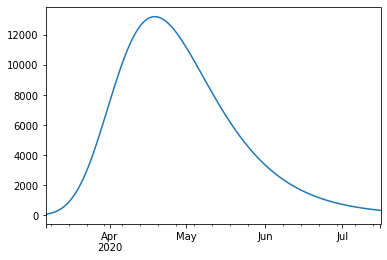

In [34]:
df_geo[pmeasure][country].rolling(14).sum().loc[start:floor].plot()

The top of this curve gives the maximum number of people that are infected at the same time.

In [35]:
print('Maximum infected is {:1.0f}'.format(df_geo[pmeasure][country].rolling(14).sum().max()))

Maximum infected is 13217


If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

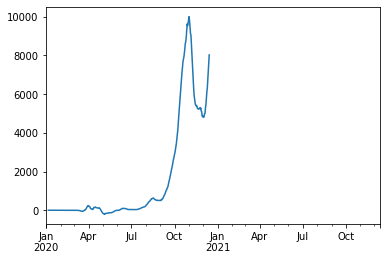

In [36]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).loc[:].plot()

In [37]:
df_geo[(rmeasure, country)] -= df_geo[(curwave, country)]

Keep exploring! Stay home, wash your hands, keep your distance.